In [8]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textblob
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [10]:
data = pd.read_csv('test.csv',encoding= 'unicode_escape')
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [11]:
data = data.drop(['Time of Tweet', 'Age of User','Country','Land Area (Km²)','Density (P/Km²)','Population -2020'], axis=1)
data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [12]:
print(data.isnull().sum())

textID       1281
text         1281
sentiment    1281
dtype: int64


In [13]:
data.shape

(4815, 3)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 113.0+ KB


In [15]:
data.text.head()

0    Last session of the day  http://twitpic.com/67ezh
1     Shanghai is also really exciting (precisely -...
2    Recession hit Veronique Branquinho, she has to...
3                                          happy bday!
4               http://twitpic.com/4w75p - I like it!!
Name: text, dtype: object

In [16]:
data = data.fillna('')
data['text'] = data['text'].apply(lambda x: x.lower())
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
stemmer = PorterStemmer()
data['text'] = data['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
data['text'] = data['text'].str.replace('[^\w\s]','')

<ipython-input-16-48b2133dc3b8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[^\w\s]','')


In [17]:
data = data.drop_duplicates()
data.head()

,textID,text,sentiment
0,f87dea47db,last session day http twitpiccom67ezh,neutral
1,96d74cb729,shanghai also realli excit precis skyscrap g...,positive
2,eee518ae67,recess hit veroniqu branquinho quit compani ...,negative
3,01082688c6,happi bday,positive
4,33987a8ee5,http twitpiccom4w75p like,positive


In [18]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to each row of the DataFrame and store the results in a new column
data['sentiment'] = data['text'].apply(get_sentiment)

# Analyze the results
mean_sentiment = data['sentiment'].mean()
positive_reviews = data[data['sentiment'] > 0.5]
negative_reviews = data[data['sentiment'] < -0.5]

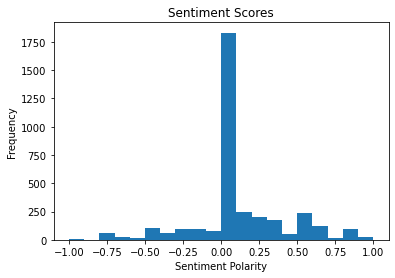

In [19]:
data['sentiment'] = data['text'].apply(get_sentiment)

# Plot a histogram of the sentiment scores
plt.hist(data['sentiment'], bins=20)
plt.title('Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()